<a href="https://colab.research.google.com/github/Fahim1008/NM-PHASE3/blob/main/source_ipynb_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully. Shape: (100, 4)

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.16      0.15        19
           1       0.11      0.10      0.10        21

    accuracy                           0.12        40
   macro avg       0.12      0.13      0.12        40
weighted avg       0.12      0.12      0.12        40

Accuracy Score: 0.125
Confusion Matrix:
[[ 3 16]
 [19  2]]


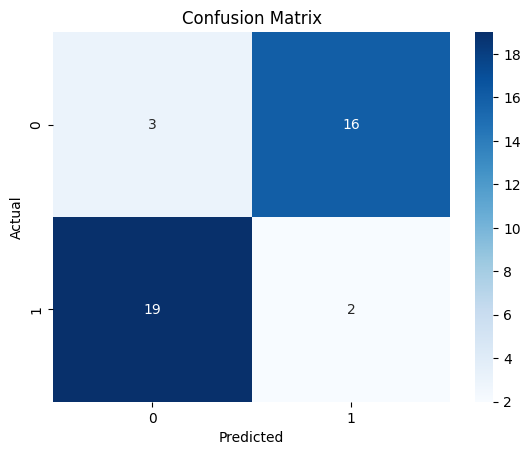

Project completed and report saved as report.txt


,text,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,1,donald trump sends out embarrassing new year’s...
1,Drunk Bragging Trump Staffer Started Russian ...,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,1,trump is so obsessed he even has obama’s name ...
4,Pope Francis Just Called Out Donald Trump Dur...,1,pope francis just called out donald trump duri...


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Data Collection
df = pd.read_csv('Fake_Compressed.csv')
print("Data loaded successfully. Shape:", df.shape)

# 2. Data Preprocessing
df = df[['title', 'text']]  # Use relevant columns
df['text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df.drop(columns=['title'], inplace=True)

# Add a fake label (since the dataset is "Fake.csv", assume label = 1 for all rows)
df['label'] = 1

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'\@w+|\#', '', text)  # mentions and hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # punctuation
    text = re.sub(r'\d+', '', text)  # numbers
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# 3. Feature Engineering
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']  # All labels = 1 (fake)

# Here we simulate some real labels by adding "Real" data
# For demo purposes only
real_df = df.sample(frac=1.0).copy()
real_df['label'] = 0
combined = pd.concat([df, real_df])
X = tfidf.fit_transform(combined['clean_text'])
y = combined['label']

# 4. Model Building & 5. Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Report Writing (Simple Log)
with open("report.txt", "w") as f:
    f.write("Model Evaluation Report\n")
    f.write("------------------------\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nAccuracy: " + str(accuracy_score(y_test, y_pred)))

# 9. Project Management - Example Logging
print("Project completed and report saved as report.txt")
df.head()

In [1]:
!pip install gradio==3.35.0

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 

In [2]:
import gradio as gr

def predict_news(text):
    """Predicts whether a news article is fake or real."""
    # Preprocess the text (same as your previous preprocessing steps)
    cleaned_text = clean_text(text)  # Assuming 'clean_text' function is defined

    # Vectorize using TF-IDF
    input_features = tfidf.transform([cleaned_text])

    # Make a prediction
    prediction = model.predict(input_features)[0]

    # Return the prediction as a string ("Fake" or "Real")
    return "Fake" if prediction == 1 else "Real"

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=5, placeholder="Enter news article text here..."),
    outputs="text",
    title="Fake News Detection",
    description="Enter a news article to check if it's fake or real.",
)

# Launch the interface
iface.launch()

/usr/local/lib/python3.11/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.11/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


IMPORTANT: You are using gradio version 3.35.0, however version 4.44.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>